<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissa%CC%83o_Cientista_de_Dados_M33_Pratique_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa

In [13]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np
import scipy.stats as st

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

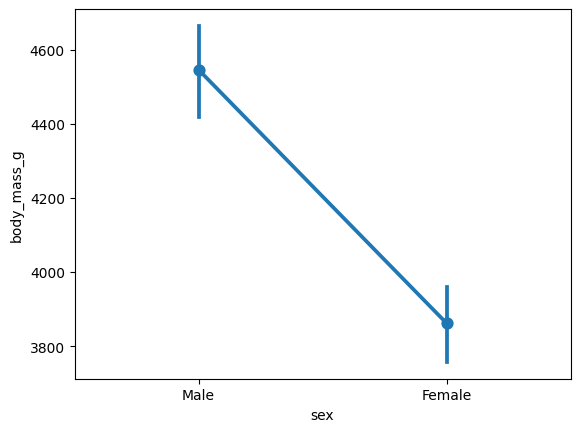

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [20]:
# Remove valores ausentes
pg = pg.dropna(subset=['sex', 'body_mass_g'])

# Cria dois grupos: machos e fêmeas
machos = pg[pg['sex'] == 'Male']['body_mass_g']
femeas = pg[pg['sex'] == 'Female']['body_mass_g']

# Realiza o teste t de Welch (não assume variância igual)
t_stat, p_valor = ttest_ind(machos, femeas, equal_var=False)

print(f'Estatística t: {t_stat:.3f}')
print(f'Valor-p: {p_valor:.4f}')

# Conclusão
if p_valor < 0.05:
    print("Rejeitamos H0: há evidências de que o peso médio é diferente entre machos e fêmeas.")
else:
    print("Não rejeitamos H0: não há evidências suficientes para afirmar diferença entre os pesos médios.")


Estatística t: 8.555
Valor-p: 0.0000
Rejeitamos H0: há evidências de que o peso médio é diferente entre machos e fêmeas.


## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

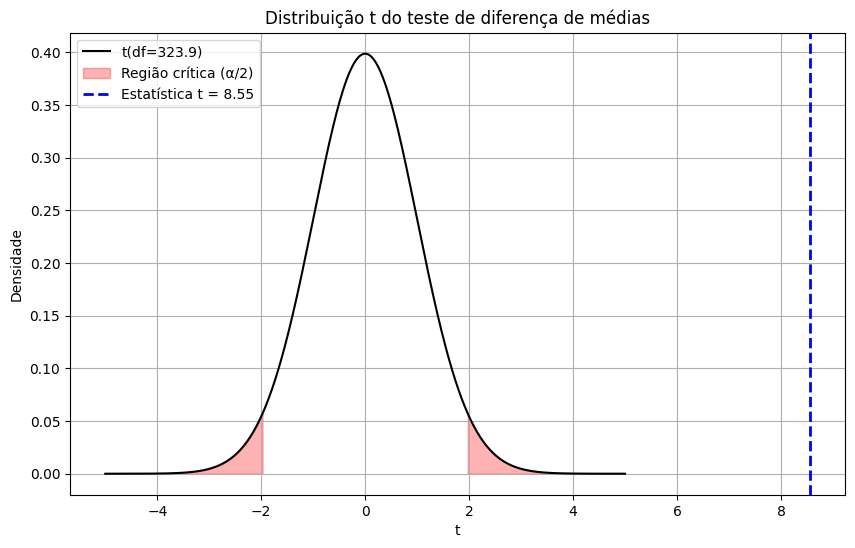

In [21]:
# Graus de liberdade aproximado pelo teste de Welch
n1 = len(machos)
n2 = len(femeas)
df = ((machos.var()/n1 + femeas.var()/n2)**2) / ((machos.var()/n1)**2/(n1-1) + (femeas.var()/n2)**2/(n2-1))

# Geração da curva t
x = np.linspace(-5, 5, 500)
y = st.t.pdf(x, df)

# Limiares de rejeição (para teste bicaudal com alpha = 0.05)
alpha = 0.05
t_critico = st.t.ppf(1 - alpha/2, df)

# Plot
plt.figure(figsize=(10,6))
plt.plot(x, y, label=f't(df={df:.1f})', color='black')

# Região crítica à direita
plt.fill_between(x, 0, y, where=(x > t_critico), color='red', alpha=0.3, label='Região crítica (α/2)')
# Região crítica à esquerda
plt.fill_between(x, 0, y, where=(x < -t_critico), color='red', alpha=0.3)

# Estatística observada
plt.axvline(t_stat, color='blue', linestyle='--', lw=2, label=f'Estatística t = {t_stat:.2f}')

# Anotações
plt.title('Distribuição t do teste de diferença de médias')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [22]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# Carregar e preparar os dados
pg = sns.load_dataset('penguins')
pg = pg.dropna(subset=['sex', 'species', 'body_mass_g'])

# Lista de espécies únicas
especies = pg['species'].unique()

# Aplicar o teste t para cada espécie
resultados = []

for especie in especies:
    subgrupo = pg[pg['species'] == especie]
    machos = subgrupo[subgrupo['sex'] == 'Male']['body_mass_g']
    femeas = subgrupo[subgrupo['sex'] == 'Female']['body_mass_g']

    # Garantir que há dados suficientes para o teste
    if len(machos) > 1 and len(femeas) > 1:
        t_stat, p_valor = ttest_ind(machos, femeas, equal_var=False)
        resultados.append((especie, len(machos), len(femeas), t_stat, p_valor))
    else:
        resultados.append((especie, len(machos), len(femeas), None, None))

# Exibir resultados
print("Espécie       | Machos | Fêmeas | t       | p-valor")
print("-----------------------------------------------------")
for especie, n_m, n_f, t, p in resultados:
    t_str = f"{t:.2f}" if t is not None else "n/a"
    p_str = f"{p:.4f}" if p is not None else "n/a"
    print(f"{especie:<13} | {n_m:^6} | {n_f:^7} | {t_str:<7} | {p_str}")


Espécie       | Machos | Fêmeas | t       | p-valor
-----------------------------------------------------
Adelie        |   73   |   73    | 13.13   | 0.0000
Chinstrap     |   34   |   34    | 5.21    | 0.0000
Gentoo        |   61   |   58    | 14.76   | 0.0000
